In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#read data
Traindf = pd.read_csv("fashion-mnist_train.csv")
Testdf = pd.read_csv("fashion-mnist_test.csv")

In [3]:
Traindf

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y_train=Traindf["label"]
Y_test =Testdf["label"]

In [5]:
X_train=Traindf.drop(["label"],axis = 1, inplace = False)
X_test=Testdf.drop(["label"],axis = 1, inplace = False)

In [6]:
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

In [7]:
Y_train,Y_test

(array([2, 9, 6, ..., 8, 8, 7], dtype=int64),
 array([0, 1, 2, ..., 8, 8, 1], dtype=int64))

In [8]:
x_train = np.array(X_train)
x_test =np.array(X_test)

In [9]:
x_train.shape,x_test.shape


((60000, 784), (10000, 784))

In [10]:
x_train=x_train.reshape(60000, 28,28)
x_test = x_test.reshape(10000, 28,28)

In [11]:
x_train.shape

(60000, 28, 28)

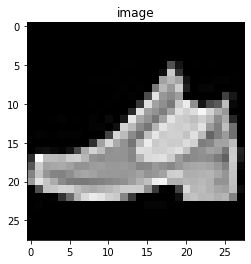

In [12]:
plt.imshow(x_train[1], cmap="gray")
plt.title("image")
plt.show()

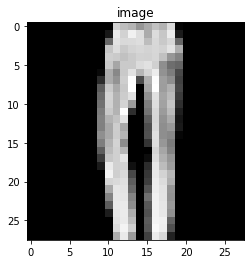

In [13]:
plt.imshow(x_test[1], cmap="gray")
plt.title("image")
plt.show()

In [14]:
y_train=tf.one_hot(Y_train,10)
y_test=tf.one_hot(Y_test,10)

In [15]:
y_train


<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)>

In [16]:
#Pre_processing
x_train, x_test = x_train/255.0, x_test/255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [17]:
x_train.shape

(60000, 28, 28, 1)

In [18]:
#build CNN model
model=keras.Sequential()
model.add(keras.layers.Input(x_train.shape[1:]))
model.add(keras.layers.Conv2D(filters=40, kernel_size=(3,3), activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters=64, kernel_size=2, strides=1, activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters=16, kernel_size=2, strides=1, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 40)        400       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 40)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 40)       160       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        10304     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                        

In [19]:
model.compile(loss="categorical_crossentropy", 
              optimizer=keras.optimizers.SGD(learning_rate = 0.01 , momentum = 0.9), 
              metrics=["accuracy"])


In [20]:
history = model.fit(x_train, y_train, epochs = 5 , batch_size = 32)

Epoch 1/5
1875/1875 [==============================] - 82s 42ms/step - loss: 0.4362 - accuracy: 0.8427
Epoch 2/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.3225 - accuracy: 0.8836
Epoch 3/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2936 - accuracy: 0.8934
Epoch 4/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2766 - accuracy: 0.8999
Epoch 5/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2644 - accuracy: 0.9044


In [21]:
import os

In [22]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.2554 - accuracy: 0.9087


[0.25540435314178467, 0.9086999893188477]

In [23]:
os.getcwd()

'C:\\Users\\USER\\Desktop\\ProjectML'

In [24]:
model.save('C:\\Users\\USER\\Desktop\\ProjectML\\my_model.h5')

In [25]:
#load model
# model= load('C:\\Users\\USER\\Desktop\\ProjectML\\my_model.h5')

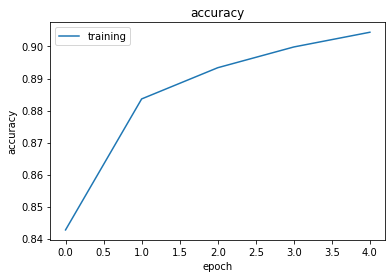

In [26]:
plt.figure()
plt.plot(history.history["accuracy"],label = 'training')
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

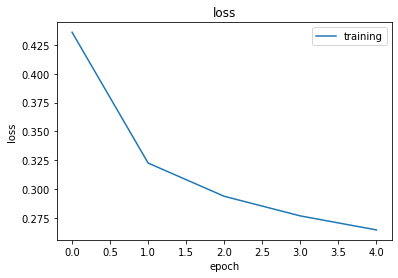

In [27]:
plt.figure()
plt.plot(history.history["loss"],label = 'training')
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [38]:
y_pred = model.predict(x_test)
x_test.shape

(10000, 28, 28, 1)

In [29]:
y_pred

array([[8.8041174e-01, 2.2241300e-05, 1.9982164e-03, ..., 2.7532089e-06,
        3.5473774e-04, 8.3815877e-07],
       [1.8623332e-05, 9.9969172e-01, 9.1729553e-06, ..., 3.5307903e-06,
        8.5493724e-05, 1.5065819e-05],
       [4.1917149e-02, 1.7541081e-05, 5.0994986e-01, ..., 1.9847479e-05,
        7.6606870e-04, 4.1225652e-05],
       ...,
       [2.1357391e-05, 1.6830911e-06, 3.5410264e-04, ..., 3.9385337e-05,
        9.9942940e-01, 1.8780172e-05],
       [2.9465512e-03, 5.0457667e-05, 1.2035418e-03, ..., 3.4913628e-05,
        9.9265891e-01, 1.4017087e-04],
       [5.7584080e-03, 6.0277200e-01, 4.5710552e-02, ..., 2.4775274e-03,
        1.5599997e-01, 2.3134889e-03]], dtype=float32)

In [30]:
pred_class = np.argmax(y_pred, axis = 1)

In [31]:
pred_class

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

In [32]:
Class_name=["T-shirt/Top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

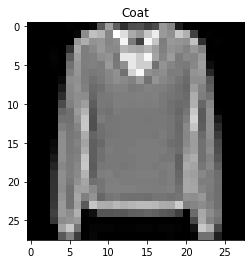

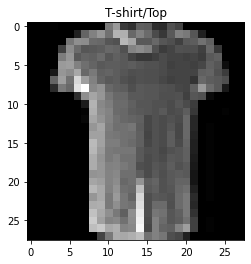

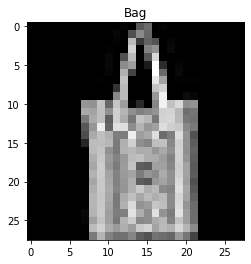

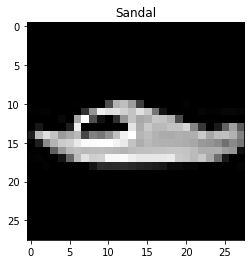

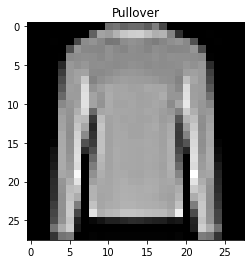

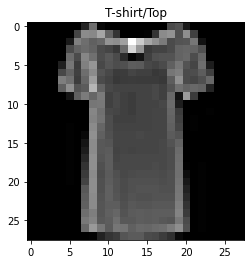

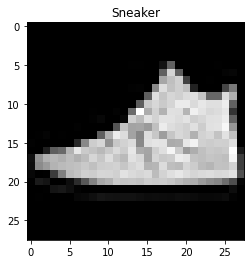

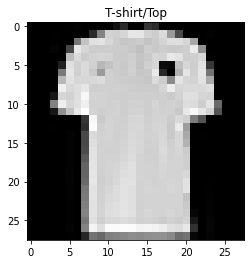

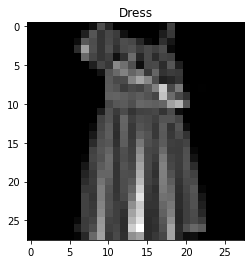

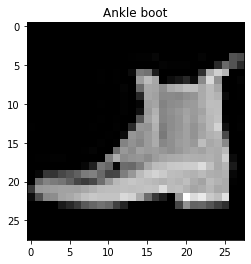

In [33]:
for i in np.random.choice(len(x_test), 10, replace=False):
    x_img = x_test[i]
    plt.imshow(x_img, cmap="gray")
    plt.title(Class_name[pred_class[i]])
    plt.show()

In [34]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confu_matrix = confusion_matrix(pred_class, Y_test)
print(confu_matrix)

[[849   1   9  14   0   0 104   0   1   0]
 [  2 990   0  12   1   0   2   0   2   0]
 [ 20   0 844  10  35   0  62   0   1   0]
 [ 12   4   8 894  11   0  13   0   0   0]
 [  1   2  65  34 913   0  84   0   1   0]
 [  2   1   0   0   0 960   0   2   1   0]
 [ 96   2  58  28  34   0 716   0   2   0]
 [  0   0   0   0   0  27   0 960   2  27]
 [ 18   0  16   7   6   2  19   0 989   1]
 [  0   0   0   1   0  11   0  38   1 972]]


In [64]:
#Test with image 
import cv2
listName=os.listdir()
ftest=[]
for names in listName:
    extend = names.split(".")[-1]
    if extend == "jpg":
        ftest.append(names)
answer = []
for img_path in ftest:
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray=cv2.resize(gray, (28,28))
    a = np.array(gray)
    a=a/255.0
    a=1-a
    a = a.reshape(1,28,28,1)
    belong_class = np.argmax(model.predict(a))
    answer.append(belong_class)

In [67]:
answer ,ftest 

([4, 3, 3, 6], ['Coat.jpg', 'dress.jpg', 'dress2.jpg', 'Tshirt.jpg'])

In [66]:
Answer=[Class_name[a] for a in answer]
print(Answer)


['Coat', 'Dress', 'Dress', 'Shirt']
